# PROYECTO FINAL GRUPO #3 
#### Ricardo Castro
#### Gabriela Gonzales
#### Grover Gonzales
#### Isabel Sandoval
#### Mariela Avircata

##### TEMA :  Glaucoma Detection using Transfer Learning

<img src="https://res.cloudinary.com/doauxwlye/image/upload/v1688827273/ProyectoFinalGrupo3/TEST_i4dfvs.png" width="70%">


<img src="https://www.databricks.com/sites/default/files/2020/04/databricks-adds-access-control-to-mlflow-model-registry_01.jpg" width="70%">

In [1]:
#Importar librerias necesarias 
import numpy as np # Algebra lineal
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Identificacion de los datos
identificacion delos datos provistos en el data set

In [2]:
#Dando lectura al data set, verificando cabeceras
df = pd.read_csv('Glaucoma/glaucoma.csv')
df.head()

,Filename,ExpCDR,Eye,Set,Glaucoma
0,001.jpg,0.7097,OD,A,0
1,002.jpg,0.6953,OS,A,0
2,003.jpg,0.9629,OS,A,0
3,004.jpg,0.7246,OD,A,0
4,005.jpg,0.6138,OS,A,0


In [3]:
#Identificando datos y variables
df.describe(include='all')

,Filename,ExpCDR,Eye,Set,Glaucoma
count,650,650.000000,650,650,650.000000
unique,650,NaN,2,2,NaN
top,001.jpg,NaN,OD,A,NaN
freq,1,NaN,327,325,NaN
mean,NaN,0.576308,NaN,NaN,0.258462
std,NaN,0.116395,NaN,NaN,0.438126
min,NaN,0.161000,NaN,NaN,0.000000
25%,NaN,0.496675,NaN,NaN,0.000000
50%,NaN,0.567650,NaN,NaN,0.000000
75%,NaN,0.648475,NaN,NaN,1.000000


In [4]:
#crea una lista con todos los valores distintos que aparecen en la columna 'Eye'. Esto es útil para identificar los diferentes tipos o categorías
#para el proyecto se identifican los ojos izquierdo y derecho
df['Eye'].unique() 

array(['OD', 'OS'], dtype=object)

In [5]:
#identifica los distintos valores para la variable set
df['Set'].unique()

array(['A', 'B'], dtype=object)

In [6]:
#identifica los distintos valores para la variable glaucoma
df['Glaucoma'].unique()

array([0, 1], dtype=int64)

# Preparacion de los datos
preparacion delos datos

In [7]:
#se trabajara sobre los datos de la variable eye, cambiando a datos cualitativo
df['eye'] = df['Eye'].map({'OD': 0, 'OS': 1})
df.head()

,Filename,ExpCDR,Eye,Set,Glaucoma,eye
0,001.jpg,0.7097,OD,A,0,0
1,002.jpg,0.6953,OS,A,0,1
2,003.jpg,0.9629,OS,A,0,1
3,004.jpg,0.7246,OD,A,0,0
4,005.jpg,0.6138,OS,A,0,1


In [8]:
#se trabajara sobre los datos de la variable set, cambiando a datos cualitativo
df['set'] = df['Set'].map({'A': 0, 'B': 1})
df.head()

,Filename,ExpCDR,Eye,Set,Glaucoma,eye,set
0,001.jpg,0.7097,OD,A,0,0,0
1,002.jpg,0.6953,OS,A,0,1,0
2,003.jpg,0.9629,OS,A,0,1,0
3,004.jpg,0.7246,OD,A,0,0,0
4,005.jpg,0.6138,OS,A,0,1,0


In [9]:
#ajustando la variable imagen
df['image'] = np.nan
df.head()

,Filename,ExpCDR,Eye,Set,Glaucoma,eye,set,image
0,001.jpg,0.7097,OD,A,0,0,0,NaN
1,002.jpg,0.6953,OS,A,0,1,0,NaN
2,003.jpg,0.9629,OS,A,0,1,0,NaN
3,004.jpg,0.7246,OD,A,0,0,0,NaN
4,005.jpg,0.6138,OS,A,0,1,0,NaN


In [10]:
#direccionando las imagenes
image_dir = 'Glaucoma/Fundus_Train_Val_Data/Fundus_Scanes_Sorted'

In [11]:
#estableciendo las rutas a los directorios
train_dir = os.path.join(image_dir, 'Train')
validation_dir = os.path.join(image_dir, 'Validation')

In [12]:
mapping = {
    0: 'Glaucoma_Negative',
    1: 'Glaucoma_Positive'
}

# Preparacion de datos train y test
preparacion delos datos

In [13]:
#importando librerias necesarias-
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt


In [14]:
# muestra la cantidad total de imágenes presentes en los directorios 'Glaucoma_Negative' y 'Glaucoma_Positive' 
#dentro del directorio de entrenamiento
train_image_negative = os.listdir(os.path.join(train_dir, 'Glaucoma_Negative'))
train_image_positive = os.listdir(os.path.join(train_dir, 'Glaucoma_Positive'))
print(len(train_image_negative) + len(train_image_positive))

520


In [15]:
# muestra la cantidad total de imágenes presentes en los directorios 'Glaucoma_Negative' y 'Glaucoma_Positive' 
#dentro del directorio de test
test_image_negative = os.listdir(os.path.join(validation_dir, 'Glaucoma_Negative'))
test_image_positive = os.listdir(os.path.join(validation_dir, 'Glaucoma_Positive'))
print(len(test_image_negative) + len(test_image_positive))

130


In [16]:
# devuelve la cantidad de filas presentes en el DataFrame 'df_train'
df_train = df[df['Filename'].isin(train_image_negative) | df['Filename'].isin(train_image_positive)]
len(df_train)

520

In [17]:
df_test = df[df['Filename'].isin(test_image_negative) | df['Filename'].isin(test_image_positive)]
len(df_test)

130

In [18]:
#Identificacion de los valores de Glaucoma yel tipo de dato

df_train['Glaucoma'].value_counts()

0    386
1    134
Name: Glaucoma, dtype: int64

In [19]:
#se realiza la fijacion del tamaño de la imagen
IMAGE_SIZE = (224,224)

In [20]:
#función carga una imagen de un directorio específico, la redimensiona y devuelve la imagen redimensionada.

def load_image(row):
    global count
    folder_name = mapping[row['Glaucoma']]
    folder_path = os.path.join(train_dir, folder_name)
    image_path = os.path.join(folder_path, row['Filename'])
    im = imread(image_path)
    im = resize(im, IMAGE_SIZE)
    return im

In [21]:
#carga y redimensiona imágenes para cada fila del DataFrame df_train utilizando la función load_image, y luego agrega las imágenes redimensionadas como una nueva columna llamada 'image' en df_train.
df_train['image'] = df_train.apply(load_image, axis=1)

C:\Users\GROVER\AppData\Local\Temp\ipykernel_3788\4059581306.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['image'] = df_train.apply(load_image, axis=1)


In [22]:
#función carga una imagen de un directorio específico, la redimensiona y devuelve la imagen redimensionada.
def load_image1(row):
    global count
    folder_name = mapping[row['Glaucoma']]
    folder_path = os.path.join(validation_dir, folder_name)
    image_path = os.path.join(folder_path, row['Filename'])
    im = imread(image_path)
    im = resize(im, IMAGE_SIZE)
    return im

In [23]:
#carga y redimensiona imágenes para cada fila del DataFrame df_train utilizando la función load_image, y luego agrega las imágenes redimensionadas como una nueva columna llamada 'image' en df_train.
df_test['image'] = df_test.apply(load_image1, axis=1)

C:\Users\GROVER\AppData\Local\Temp\ipykernel_3788\4193692233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['image'] = df_test.apply(load_image1, axis=1)


In [24]:
#asigna valores de entrenamiento 

X_image_train = df_train['image']
X_data_train = df_train[['ExpCDR', 'eye', 'set']]
y_train = df_train['Glaucoma']

In [25]:
#asigna valores de test

X_image_test = df_test['image']
X_data_test = df_test[['ExpCDR', 'eye', 'set']]
y_test = df_test['Glaucoma']

In [26]:
# convierte la columna de imágenes X_image_train en un arreglo de NumPy apilado.
X_image_train_stacked = np.stack(X_image_train.values)
X_image_test_stacked = np.stack(X_image_test.values)

In [27]:
from sklearn.utils.class_weight import compute_class_weight

In [28]:
#se ajustarán automáticamente los pesos de clase en función de la distribución de las clases en los datos de entrenamiento.
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([0.67357513, 1.94029851])

In [29]:
class_weight_dict = {
    0: class_weights[0],
    1: class_weights[1]
}
class_weight_dict

{0: 0.6735751295336787, 1: 1.9402985074626866}

# Modelo de entrenamiento


In [30]:
#importacion de librerias

import tensorflow as tf
from tensorflow.keras import Sequential, layers, Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from sklearn.metrics import classification_report

In [31]:
resnet = ResNet50(input_shape=IMAGE_SIZE+(3,), weights='imagenet', include_top=False)
vgg = VGG16(input_shape=IMAGE_SIZE+(3,), weights='imagenet', include_top=False)
xception = Xception(input_shape=IMAGE_SIZE+(3,), weights='imagenet', include_top=False)
resnet101 = ResNet101(input_shape=IMAGE_SIZE+(3,), weights='imagenet', include_top=False)
inception = InceptionV3(input_shape=IMAGE_SIZE+(3,), weights='imagenet', include_top=False)
mobilenet = MobileNetV2(input_shape=IMAGE_SIZE+(3,), weights='imagenet', include_top=False)
efficientnet = EfficientNetB7(input_shape=IMAGE_SIZE+(3,), weights='imagenet', include_top=False)

In [32]:
#define un diccionario llamado model_dict que contiene diferentes modelos de redes neuronales predefinidas.
#Cada modelo se asocia con una clave, que es un nombre descriptivo del modelo, y el valor correspondiente es el objeto del modelo
#de red neuronal.

model_dict = {
    'resnet50': resnet,
    'vgg16': vgg,
    'xception': xception,
    'resnet101': resnet101,
    'inception': inception,
    'mobilenet': mobilenet,
    'efficientnetB7': efficientnet
}
model_dict

{'resnet50': <keras.engine.functional.Functional at 0x1d6265f0a90>,
 'vgg16': <keras.engine.functional.Functional at 0x1d6265a71f0>,
 'xception': <keras.engine.functional.Functional at 0x1d626939430>,
 'resnet101': <keras.engine.functional.Functional at 0x1d62769aa30>,
 'inception': <keras.engine.functional.Functional at 0x1d627e20460>,
 'mobilenet': <keras.engine.functional.Functional at 0x1d6284e6d60>,
 'efficientnetB7': <keras.engine.functional.Functional at 0x1d62bf9dfd0>}

In [33]:
for key, model in model_dict.items():
    for layer in model.layers:
        layer.trainable = False

In [34]:
#modelo de entramiento
for key, model in model_dict.items():
    x = layers.Flatten()(model.output)
    prediction = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=model.input, outputs=prediction)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print(key)
    print(model.summary())
    model.fit(X_image_train_stacked, y_train, class_weight=class_weight_dict, epochs=10)
    y_pred = model.predict(X_image_test_stacked)
    y_pred = [round(y[0]) for y in y_pred]
    print(classification_report(y_test, y_pred))

resnet50
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
17/17 [==============================] - 48s 3s/step - loss: 0.8151 - accuracy: 0.5692
Epoch 2/10
17/17 [==============================] - 46s 3s/step - loss: 0.5950 - accuracy: 0.6865
Epoch 3/10
17/17 [==============================] - 46s 3s/step - loss: 0.5987 - accuracy: 0.6923
Epoch 4/10
17/17 [==============================] - 47s 3s/step - loss: 0.5531 - accuracy: 0.7192
Epoch 5/10
17/17 [==============================] - 45s 3s/step - loss: 0.5199 - accuracy: 0.7327
Epoch 6/10
17/17 [==============================] - 46s 3s/step - loss: 0.4852 - accuracy: 0.7673
Epoch 7/10
17/17 [==============================] - 48s 3s/step - loss: 0.4571 - accuracy: 0.7923
Epoch 8/10
17/17 [==============================] - 49s 3s/step - loss: 0.4594 - accuracy: 0.7769
Epoch 9/10
17/17 [==============================] - 48s 3s/step - loss: 0.4626 - accuracy: 0.7846
Epoch 10/10
5/5 [==============================] - 12s 2s/step
              precision    recall  f1-score   support



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                                  
 batch_normalization_31 (BatchN  (None, 25, 25, 64)  192         ['conv2d_31[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_27 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_31[0][0]'] 
                                                                                                  
 conv2d_32 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_27[0][0]']          
                                                                                                  
 batch_normalization_32 (BatchN  (None, 25, 25, 96)  288         ['conv2d_32[0][0]']              
 ormalization)                                                                                    
          

In [35]:
#crea una capa de entrada en el modelo de red neuronal. Es una forma de especificar el tensor de entrada que se utilizará en el modelo.
# especifica la forma de entrada del tensor. En este caso, se especifica que el tensor de entrada tendrá una forma de (3,), lo que significa que será un vector unidimensional de longitud 3.
data_input = layers.Input(shape=(3,))

In [36]:
#se agrega una capa adicional con una función de activación ReLU al modelo existente
x1 = layers.Dense(1, activation='relu')(data_input)
x1 = Model(inputs=data_input, outputs=x1)

In [37]:
#se agrega una capa de aplanamiento adicional al modelo mobilenet. La salida del modelo original (mobilenet.output) se conecta a esta nueva capa de aplanamiento, y luego se crea un nuevo modelo utilizando la capa de entrada original (mobilenet.input) y la nueva capa de aplanamiento como salida.
x2 = layers.Flatten()(mobilenet.output)
x2 = Model(inputs=mobilenet.input, outputs=x2)

In [38]:
#crea una capa de concatenación (concatenate) que toma las salidas de x1 y x2 como entrada y las concatena a lo largo de una nueva dimensión. x1.output y x2.output representan las salidas de los modelos x1 y x2, respectivamente.

combined = layers.concatenate([x1.output, x2.output])

In [39]:
#se agregan tres capas densas adicionales a la salida combinada de los modelos x1 y x2. Estas capas agregan más capacidad de aprendizaje y transforman las características combinadas en una predicción final.

x_combined = layers.Dense(150, activation='relu')(combined)
x_combined = layers.Dense(50, activation='relu')(x_combined)
x_combined = layers.Dense(1, activation='sigmoid')(x_combined)

In [40]:
#combina las capas de entrada y salida de los modelos x1 y x2 en un nuevo modelo. Las capas de entrada se especifican como una lista [x1.input, x2.input] y la capa de salida se especifica como x_combined. El nuevo modelo resultante, llamado model, tendrá las capas de entrada y salida definidas
model = Model(inputs=[x1.input, x2.input], outputs=x_combined)

In [41]:
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [42]:
#compila el modelo definido con el optimizador Adam, la función de pérdida binary_crossentropy y la métrica de precisión (accuracy).
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del Modelo 


In [43]:
#el modelo comenzará a entrenarse utilizando los datos y las configuraciones especificadas. Durante el entrenamiento, se ajustarán los pesos del modelo para minimizar la función de pérdida (binary_crossentropy) y se calculará la métrica de precisión (accuracy).
model.fit([X_data_train, X_image_train_stacked], y=y_train, class_weight=class_weight_dict, epochs=15)

Epoch 1/15
17/17 [==============================] - 11s 480ms/step - loss: 3.8336 - accuracy: 0.6038
Epoch 2/15
17/17 [==============================] - 8s 482ms/step - loss: 1.2032 - accuracy: 0.7173
Epoch 3/15
17/17 [==============================] - 8s 484ms/step - loss: 0.6444 - accuracy: 0.8481
Epoch 4/15
17/17 [==============================] - 8s 484ms/step - loss: 0.2107 - accuracy: 0.9308
Epoch 5/15
17/17 [==============================] - 8s 479ms/step - loss: 0.1402 - accuracy: 0.9538
Epoch 6/15
17/17 [==============================] - 8s 492ms/step - loss: 0.2065 - accuracy: 0.9250
Epoch 7/15
17/17 [==============================] - 8s 488ms/step - loss: 0.1301 - accuracy: 0.9500
Epoch 8/15
17/17 [==============================] - 8s 483ms/step - loss: 0.0218 - accuracy: 0.9923
Epoch 9/15
17/17 [==============================] - 8s 488ms/step - loss: 0.0228 - accuracy: 0.9942
Epoch 10/15
17/17 [==============================] - 8s 480ms/step - loss: 0.0078 - accuracy: 1.000

In [44]:
#evalúa el modelo utilizando los datos de prueba X_data_test y X_image_test_stacked, junto con las etiquetas de prueba y_test.
model.evaluate([X_data_test, X_image_test_stacked], y_test)

5/5 [==============================] - 2s 323ms/step - loss: 1.6741 - accuracy: 0.7000


[1.6740766763687134, 0.699999988079071]

# Predicciones


In [45]:
#generan predicciones utilizando el modelo entrenado en los datos de prueba y luego redondean los valores de las predicciones a números enteros binarios.
y_pred = model.predict([X_data_test, X_image_test_stacked])
y_pred = [round(y[0]) for y in y_pred]

5/5 [==============================] - 2s 321ms/step


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        96
           1       0.43      0.47      0.45        34

    accuracy                           0.70       130
   macro avg       0.62      0.63      0.62       130
weighted avg       0.71      0.70      0.70       130



In [47]:
#se agrega una capa de aplanamiento adicional al modelo preentrenado VGG. La salida del modelo VGG (vgg.output) se conecta a esta nueva capa de aplanamiento, y luego se crea un nuevo modelo utilizando la capa de entrada original (vgg.input) y la nueva capa de aplanamiento como salida
x2_vgg = layers.Flatten()(vgg.output)
x2_vgg = Model(inputs=vgg.input, outputs=x2_vgg)

In [48]:
#utiliza la función concatenate de la biblioteca Keras para combinar las salidas de dos modelos diferentes, x1 y x2_vgg, en una sola capa de salida combinada.
combined_vgg = layers.concatenate([x1.output, x2_vgg.output])

In [49]:
#define tres capas densas adicionales que se aplican a la salida combinada (combined_vgg) de los modelos x1 y x2_vgg
x_combined_vgg = layers.Dense(150, activation='relu')(combined_vgg)
x_combined_vgg = layers.Dense(50, activation='relu')(x_combined_vgg)
x_combined_vgg = layers.Dense(1, activation='sigmoid')(x_combined_vgg)

In [50]:
#combina las capas de entrada y salida de los modelos x1 y x2_vgg en un nuevo modelo. Las capas de entrada se especifican como una lista [x1.input, x2_vgg.input] y la capa de salida se especifica como x_combined_vgg. El nuevo modelo resultante, llamado model_vgg, tendrá las capas de entrada y salida definidas.

model_vgg = Model(inputs=[x1.input, x2_vgg.input], outputs=x_combined_vgg)

In [51]:
model_vgg.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                          

In [52]:
#compila el modelo definido con el optimizador Adam, la función de pérdida binary_crossentropy y la métrica de precisión (accuracy).

model_vgg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
#Al llamar a model_vgg.fit(), el modelo_vgg comenzará a entrenarse utilizando los datos y las configuraciones especificadas. Durante el entrenamiento, se ajustarán los pesos del modelo para minimizar la función de pérdida (binary_crossentropy) y se utilizarán los pesos de clase especificados para tratar el desequilibrio de clases.

model_vgg.fit([X_data_train, X_image_train_stacked], y_train, class_weight=class_weight_dict, epochs=50)

Epoch 1/50
17/17 [==============================] - 50s 3s/step - loss: 1.1119 - accuracy: 0.5058
Epoch 2/50
17/17 [==============================] - 49s 3s/step - loss: 0.6100 - accuracy: 0.6635
Epoch 3/50
17/17 [==============================] - 49s 3s/step - loss: 0.5664 - accuracy: 0.7038
Epoch 4/50
17/17 [==============================] - 50s 3s/step - loss: 0.5424 - accuracy: 0.7462
Epoch 5/50
17/17 [==============================] - 49s 3s/step - loss: 0.5765 - accuracy: 0.7000
Epoch 6/50
17/17 [==============================] - 49s 3s/step - loss: 0.7694 - accuracy: 0.5769
Epoch 7/50
17/17 [==============================] - 49s 3s/step - loss: 0.5578 - accuracy: 0.6808
Epoch 8/50
17/17 [==============================] - 49s 3s/step - loss: 0.4893 - accuracy: 0.7712
Epoch 9/50
17/17 [==============================] - 49s 3s/step - loss: 0.4271 - accuracy: 0.7885
Epoch 10/50
17/17 [==============================] - 49s 3s/step - loss: 0.4324 - accuracy: 0.7962
Epoch 11/50
17/17 [

In [54]:
resultado = model_vgg.evaluate([X_data_test, X_image_test_stacked], y_test)
print("Pérdida en el conjunto de prueba:", resultado[0])
print("Precisión en el conjunto de prueba:", resultado[1])

5/5 [==============================] - 12s 2s/step - loss: 1.5186 - accuracy: 0.5538
Pérdida en el conjunto de prueba: 1.5186017751693726
Precisión en el conjunto de prueba: 0.5538461804389954


In [55]:
df_test.head()

,Filename,ExpCDR,Eye,Set,Glaucoma,eye,set,image
482,483.jpg,0.4803,OS,A,0,1,0,"[[[0.0057709501720112875, 0.005770950076733795..."
483,484.jpg,0.4529,OD,B,0,0,1,"[[[0.0036476558263308567, 0.003647655826330856..."
484,485.jpg,0.3976,OS,B,0,1,1,"[[[0.005346717992144828, 0.005346717992144828,..."
486,487.jpg,0.6659,OS,B,0,1,1,"[[[0.002243290752095683, 0.0022577448446773076..."
487,488.jpg,0.6364,OD,A,0,0,0,"[[[0.0037924282660345807, 0.003793898524223909..."


# Primera evaluación del modelo entrenado
Obtener la primera imagen del conjunto de prueba

Realizar la predicción con el modelo

1/1 [==============================] - 0s 220ms/step
La imagen fue clasificada como 'Glaucoma Positivo'.


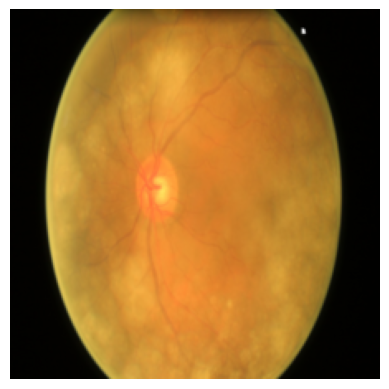

In [56]:
# Obtener la primera imagen del conjunto de prueba
imagen_prueba = X_image_test_stacked[0]
datos_prueba = X_data_test.iloc[0]

# Expandir dimensiones de la imagen para que coincida con el formato de entrada del modelo
imagen_prueba_expandida = np.expand_dims(imagen_prueba, axis=0)

# Realizar la predicción con el modelo
prediccion = model_vgg.predict([datos_prueba.values.reshape(1, -1), imagen_prueba_expandida])

# Redondear la predicción a la clase correspondiente
clase_predicha = round(prediccion[0][0])

# Imprimir el resultado de la predicción
if clase_predicha == 0:
    print("La imagen fue clasificada como 'Glaucoma Negativo'.")
else:
    print("La imagen fue clasificada como 'Glaucoma Positivo'.")
    
# Visualizar la imagen de prueba
plt.imshow(imagen_prueba, cmap=plt.cm.binary)
plt.axis('off')
plt.show()


In [57]:
datos_prueba.head()

ExpCDR    0.4803
eye       1.0000
set       0.0000
Name: 482, dtype: float64

# Segunda evaluación del modelo entrenado
Primero cargamos 2 imagenes en la nube 1 Glucoma Positivo y la otra Glucoma Negativo y la ruta de la  URL de ambas imagnes, ahora vamos a realizar una predicción con las 2 imagenes utilizando un modelo preentrenado y realizamos la predicción.

1/1 [==============================] - 0s 110ms/step
La imagen fue clasificada como 'Glaucoma Positivo'.


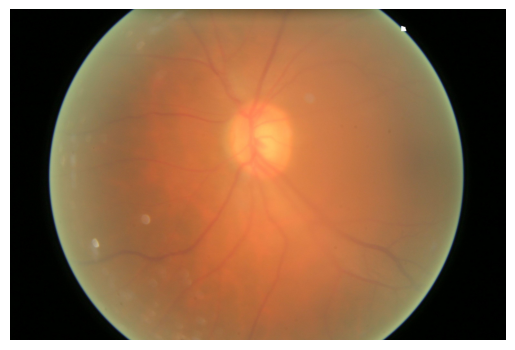

In [58]:
import requests
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

ruta_imagen = "https://res.cloudinary.com/doauxwlye/image/upload/v1688764872/ProyectoFinalGrupo3/ProyectoFinalGPositivo1_piwcgj.jpg"
#ruta_imagen = "https://res.cloudinary.com/doauxwlye/image/upload/v1688764872/ProyectoFinalGrupo3/ProyectoFinalGNegativo0_sccdyj.jpg"

# Cargar la imagen
imagen_manual = imread(ruta_imagen)
imagen_manual = resize(imagen_manual, IMAGE_SIZE)

# Expandir dimensiones de la imagen para que coincida con el formato de entrada del modelo
imagen_manual_expandida = np.expand_dims(imagen_manual, axis=0)

# Realizar la predicción con el modelo
prediccion_manual = model_vgg.predict([datos_prueba.values.reshape(1, -1), imagen_manual_expandida])

# Redondear la predicción a la clase correspondiente
clase_predicha_manual = round(prediccion_manual[0][0])

# Imprimir el resultado de la predicción
if clase_predicha_manual == 0:
    print("La imagen fue clasificada como 'Glaucoma Negativo'.")
else:
    print("La imagen fue clasificada como 'Glaucoma Positivo'.")
    

# Visualizar la imagen y Descargar la imagen desde la URL
response = requests.get(ruta_imagen)
imagen_bytes = response.content

# Cargar la imagen utilizando PIL
imagen = Image.open(BytesIO(imagen_bytes))

# Mostrar la imagen utilizando matplotlib
plt.imshow(imagen)
plt.axis('off')
plt.show()


In [59]:
datos_prueba.values.reshape(1, -1).shape
print(datos_prueba.values.reshape(1, -1).shape)


(1, 3)


In [60]:

print("Valores de imagen_manual_expandida:")
print(imagen_prueba_expandida.shape)


Valores de imagen_manual_expandida:
(1, 224, 224, 3)


# Tercera evaluación del modelo entrenado

Realizamos predicciones utilizando un modelo entrenado para un conjunto de imágenes de prueba desde un rango de indices 0 a 10 y visualizamos en una matriz la prediccion si la imagen fue clasificada como 'Glaucoma Positivo' o 'Glaucoma Negativo'.


In [61]:
# Obtener un rango de índices de imágenes para la predicción
from sklearn.metrics import confusion_matrix

1/1 [==============================] - 0s 110ms/step
La imagen 483.jpg fue clasificada como 'Glaucoma Positivo'.
1/1 [==============================] - 0s 121ms/step
La imagen 484.jpg fue clasificada como 'Glaucoma Negativo'.
1/1 [==============================] - 0s 120ms/step
La imagen 485.jpg fue clasificada como 'Glaucoma Negativo'.
1/1 [==============================] - 0s 125ms/step
La imagen 487.jpg fue clasificada como 'Glaucoma Positivo'.
1/1 [==============================] - 0s 145ms/step
La imagen 488.jpg fue clasificada como 'Glaucoma Negativo'.
1/1 [==============================] - 0s 125ms/step
La imagen 489.jpg fue clasificada como 'Glaucoma Negativo'.
1/1 [==============================] - 0s 125ms/step
La imagen 491.jpg fue clasificada como 'Glaucoma Positivo'.
1/1 [==============================] - 0s 120ms/step
La imagen 492.jpg fue clasificada como 'Glaucoma Positivo'.
1/1 [==============================] - 0s 120ms/step
La imagen 493.jpg fue clasificada como 'Gla

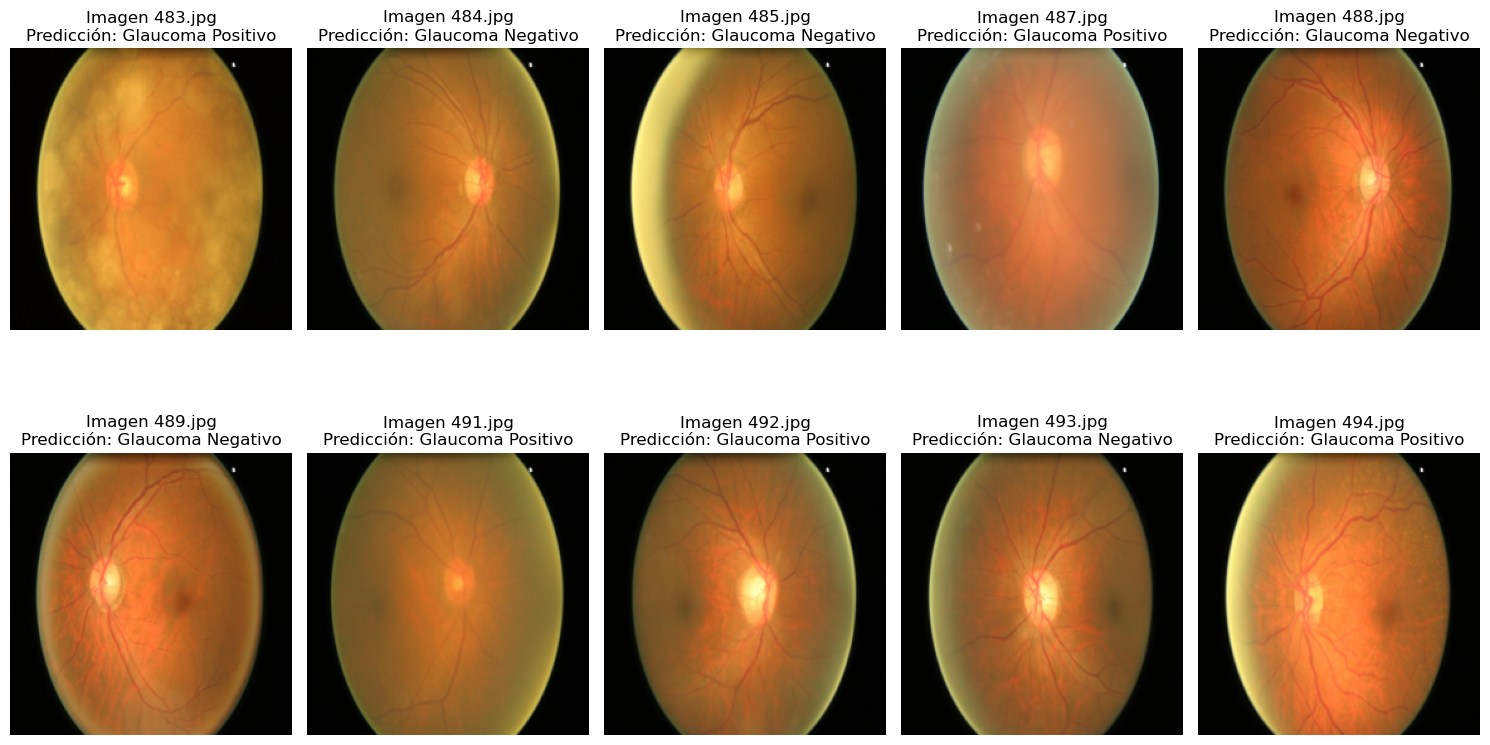

In [62]:
import matplotlib.pyplot as plt
import math

# Obtener un rango de índices para las pruebas
rango_indices = range(0, 10)  # Ajusta el rango según sea necesario

# Configurar la matriz de subplots
num_filas = math.ceil(len(rango_indices) / 5)
fig, axs = plt.subplots(num_filas, 5, figsize=(15, 9))

# Realizar predicciones y mostrar las imágenes en la matriz de subplots
for i, indice in enumerate(rango_indices):
    imagen_prueba = X_image_test_stacked[indice]
    datos_prueba = X_data_test.iloc[indice]
    nombre_imagen = df_test.iloc[indice]['Filename']
    
    # Expandir dimensiones de la imagen para que coincida con el formato de entrada del modelo
    imagen_prueba_expandida = np.expand_dims(imagen_prueba, axis=0)

    # Realizar la predicción con el modelo
    prediccion = model_vgg.predict([datos_prueba.values.reshape(1, -1), imagen_prueba_expandida])
    clase_predicha = round(prediccion[0][0])

    # Imprimir el resultado de la predicción
    if clase_predicha == 0:
        print("La imagen", nombre_imagen, "fue clasificada como 'Glaucoma Negativo'.")
    else:
        print("La imagen", nombre_imagen, "fue clasificada como 'Glaucoma Positivo'.")

    # Mostrar la imagen en el subplot correspondiente
    fila = i // 5
    columna = i % 5
    axs[fila, columna].imshow(imagen_prueba, cmap=plt.cm.binary)
    axs[fila, columna].axis('off')
    axs[fila, columna].set_title("Imagen " + str(nombre_imagen) + "\nPredicción: " + ("Glaucoma Negativo" if clase_predicha == 0 else "Glaucoma Positivo"))

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la matriz de subplots
plt.show()


<img src="https://res.cloudinary.com/doauxwlye/image/upload/v1688827273/ProyectoFinalGrupo3/TEST_i4dfvs.png" width="70%">

Ahora vamos a guardar el mejor modelo entrenado: Antes de poder desplegar el modelo. utilizamos la función save() del modelo.  modelo es model_vgg,guardamos de la siguiente manera:

In [63]:
model_vgg.save('modelo_vgg_grupo3.h5')

#  MLFlow

MLFLow es una plataforma de código abierto para administrar el ciclo de vida de ML, incluida la experimentación, la reproducibilidad, la implementación y un registro de modelo central. Actualmente, MLFLow ofrece cuatro componentes:

<img src="https://images.datacamp.com/image/upload/v1666023613/M_Lflow_Components_64d5714287.png" width="70%">

<img src="https://www.databricks.com/sites/default/files/2020/04/databricks-adds-access-control-to-mlflow-model-registry_01.jpg" width="70%">

## Iniciar un servidor MLflow

mlflow server

### 1. Crear un entorno Conda

Ejecutar los siguientes comandos en la terminal. Se sugiere asegurarse de que conda esté instalado:

1. `conda create -n mlops python=3.9 ipykernel`
creará un env conda llamado mlops e instalará la versión 3.9 de python y un ipykernel dentro de este entorno

2. Activar el ambiente
`conda activate mlops`

3. Agregar el entorno recién creado al notebook como kernel
`python -m ipykernel install --user --name=mlops`

4. Instalar los notebooks de jupyter dentro del entorno
`pip install notebook`

5. Instalar todas las dependencias requeridas para ejecutar el presente notebook

* `pip install pandas`
* `pip install numpy`
* `pip install scikit-learn`
* `pip install imblearn`
* `pip install matplotlib`
* `pip install mlflow`

Finalmente, abrir este notebook usando el siguiente comando: (desde el prompt de anaconda dentro del entorno de conda)

`jupyter notebook`


In [64]:
conda activate mlops


Note: you may need to restart the kernel to use updated packages.


conda activate mlops

#### Ejecutamos en el Prompt de Anaconda 
mlflow server
##### Podemos observar que nuestra direccion es http://127.0.0.1:5000

<img src="https://res.cloudinary.com/doauxwlye/image/upload/v1688822975/ProyectoFinalGrupo3/1_hopjin.jpg" width="70%">

### Configurar la ubicación del registro de MLflow 
####  Se crea un nuevo experimento 
Creamos un nuevo experimento en MLflow con el nombre "GLAUCOMA_GRUPO3". Esto te permite organizar y realizar un seguimiento de las ejecuciones y modelos de machine learning. Podemos utilizar este experimento para almacenar métricas, parámetros y otros detalles asociados con cada ejecución de tu modelo

In [66]:
import mlflow
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import mlflow
import mlflow.sklearn
import mlflow.tensorflow

# Configurar la ubicación del registro de MLflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")

mlflow.create_experiment("GRUPO3_Glaucoma") # Se crea un nuevo experimento 

'236764268995355381'

<img src="https://res.cloudinary.com/doauxwlye/image/upload/v1688822975/ProyectoFinalGrupo3/4_sh9esf.jpg" width="70%">

#### Vamos a utilizar el experimento creado (GRUPO3_Glaucoma)
#### Registrar una métrica (accuracy_score_vgg)
#### Registrar el modelo en MLflow con el nombre de  (model_vgggrupo3)

In [67]:
import mlflow
import mlflow.keras
from tensorflow.keras import layers, Model
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight

# Iniciar un experimento en MLflow
mlflow.set_experiment("GRUPO3_Glaucoma")

# Definir la arquitectura del modelo combinado
x2_vgg = layers.Flatten()(vgg.output)
x2_vgg = Model(inputs=vgg.input, outputs=x2_vgg)

combined_vgg3 = layers.concatenate([x1.output, x2_vgg.output])

x_combined_vgg3 = layers.Dense(150, activation='relu')(combined_vgg3)
x_combined_vgg3 = layers.Dense(50, activation='relu')(x_combined_vgg3)
x_combined_vgg3 = layers.Dense(1, activation='sigmoid')(x_combined_vgg3)

model_vgg3 = Model(inputs=[x1.input, x2_vgg.input], outputs=x_combined_vgg3)

# Resumen del modelo
model_vgg3.summary()

# Compilar el modelo
model_vgg3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_vgg3.fit([X_data_train, X_image_train_stacked], y_train, epochs=50, class_weight=class_weight_dict)

# Evaluar el modelo
#accuracy = model_vgg3.evaluate([X_data_test, X_image_test_stacked], y_test)

# Predecir las clases
y_pred_vgg = model_vgg3.predict([X_data_test, X_image_test_stacked])
y_pred_vgg = [round(y[0]) for y in y_pred_vgg]

# Calcular métricas adicionales
accuracy_score_vgg = accuracy_score(y_test, y_pred_vgg)

# Registrar las métricas en MLflow
#mlflow.log_metric("accuracy", accuracy)
mlflow.log_metric("accuracy_score_vgg", accuracy_score_vgg)

# Registrar el modelo en MLflow
mlflow.keras.log_model(model_vgg3, "model_vgggrupo3")

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                          

2023/07/11 13:41:55 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\GROVER\AppData\Local\Temp\tmpja0buu9e\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\GROVER\AppData\Local\Temp\tmpja0buu9e\model\data\model\assets
C:\ProgramData\Anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


<img src="https://res.cloudinary.com/doauxwlye/image/upload/v1688823849/ProyectoFinalGrupo3/6_hv2ddl.png" width="70%">

### Cargar el modelo desde MLflow con el ID Runs

In [68]:
import mlflow.keras

# Cargar el modelo desde MLflow
modelo_cargado = mlflow.keras.load_model("runs:/ea04692f7de744c1aa3c331b1217c5e5/model_vgggrupo3")

### Realizamos la 1ra  predicción  con el modelo cargado en el mlflow

1/1 [==============================] - 0s 220ms/step
La imagen fue clasificada como 'Glaucoma Positivo'.


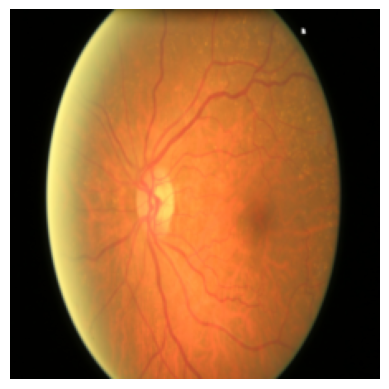

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener la imagen 9 del conjunto de prueba
imagen_prueba = X_image_test_stacked[9]
datos_prueba = X_data_test.iloc[9]

# Expandir dimensiones de la imagen para que coincida con el formato de entrada del modelo
imagen_prueba_expandida = np.expand_dims(imagen_prueba, axis=0)

# Realizar la predicción con el modelo cargado
prediccion = modelo_cargado.predict([datos_prueba.values.reshape(1, -1), imagen_prueba_expandida])

# Redondear la predicción a la clase correspondiente
clase_predicha = round(prediccion[0][0])

# Imprimir el resultado de la predicción
if clase_predicha == 0:
    print("La imagen fue clasificada como 'Glaucoma Negativo'.")
else:
    print("La imagen fue clasificada como 'Glaucoma Positivo'.")

# Visualizar la imagen de prueba
plt.imshow(imagen_prueba, cmap=plt.cm.binary)
plt.axis('off')
plt.show()


### Realizamos la 2da  predicción  con el modelo cargado en el mlflow

1/1 [==============================] - 0s 110ms/step
La imagen fue clasificada como 'Glaucoma Positivo'.


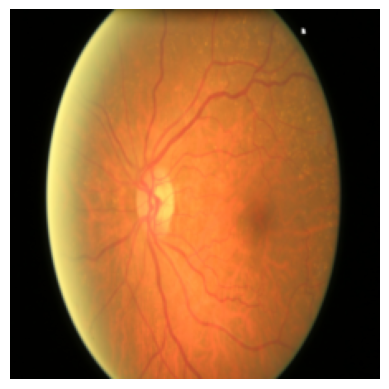

In [70]:
ruta_imagen = "https://res.cloudinary.com/doauxwlye/image/upload/v1688824146/ProyectoFinalGrupo3/Im011_ACRIMA_jijdgv.jpg"

# Cargar la imagen
imagen_manual = imread(ruta_imagen)
imagen_manual = resize(imagen_manual, IMAGE_SIZE)

# Expandir dimensiones de la imagen para que coincida con el formato de entrada del modelo
imagen_manual_expandida = np.expand_dims(imagen_manual, axis=0)

# Realizar la predicción con el modelo cargado
prediccion = modelo_cargado.predict([datos_prueba.values.reshape(1, -1), imagen_prueba_expandida])

# Redondear la predicción a la clase correspondiente
clase_predicha = round(prediccion[0][0])

# Imprimir el resultado de la predicción
if clase_predicha == 0:
    print("La imagen fue clasificada como 'Glaucoma Negativo'.")
else:
    print("La imagen fue clasificada como 'Glaucoma Positivo'.")

# Visualizar la imagen de prueba
plt.imshow(imagen_prueba, cmap=plt.cm.binary)
plt.axis('off')
plt.show()

#### Registrar el modelo (model_vgg_Grupo3) con la primera versión y obtenemos el ID de la versión creada

In [71]:
import mlflow

# Finalizar la ejecución actual si hay alguna activa
if mlflow.active_run():
    mlflow.end_run()

with mlflow.start_run(run_name="grupo_3") as run:
    model_path = "runs:/58133644a06744f9892871b6882929b9/model_vgggrupo3"

    # Registrar el modelo
    result = mlflow.register_model(model_path, "model_vgg_Grupo3")

    # Obtener el ID de la versión creada
    version_id = result.version
    print("Se ha creado la versión del modelo con el ID:", version_id)

Registered model 'model_vgg_Grupo3' already exists. Creating a new version of this model...
2023/07/11 13:58:09 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: model_vgg_Grupo3, version 2


Se ha creado la versión del modelo con el ID: 2


Created version '2' of model 'model_vgg_Grupo3'.


<img src="https://res.cloudinary.com/doauxwlye/image/upload/v1688824546/ProyectoFinalGrupo3/7_c15yud.jpg" width="70%">

<img src="https://res.cloudinary.com/doauxwlye/image/upload/v1688824546/ProyectoFinalGrupo3/8_surmig.jpg" width="70%">

#### El modelo (model_vgg_Grupo3)  vamos a pasar a Staging  - puesta en marcha 

In [72]:
client = mlflow.tracking.MlflowClient()
client.transition_model_version_stage(
    name="model_vgg_Grupo3",
    version=1,
    stage="Staging"  
) 

<ModelVersion: aliases=[], creation_timestamp=1688822821002, current_stage='Staging', description='', last_updated_timestamp=1689098351946, name='model_vgg_Grupo3', run_id='58133644a06744f9892871b6882929b9', run_link='', source='file:///C:/Users/GROVER/mlruns/717841233104643560/58133644a06744f9892871b6882929b9/artifacts/model_vgggrupo3', status='READY', status_message='', tags={}, user_id='', version='1'>

<img src="https://res.cloudinary.com/doauxwlye/image/upload/v1688824994/ProyectoFinalGrupo3/9_gr6xva.jpg" width="70%">

### El modelo (model_vgg_Grupo3) pasamos a Producción

In [73]:
client = mlflow.tracking.MlflowClient()
client.transition_model_version_stage(
    name="model_vgg_Grupo3",
    version=1,
    stage="Production"  
) 

<ModelVersion: aliases=[], creation_timestamp=1688822821002, current_stage='Production', description='', last_updated_timestamp=1689098355196, name='model_vgg_Grupo3', run_id='58133644a06744f9892871b6882929b9', run_link='', source='file:///C:/Users/GROVER/mlruns/717841233104643560/58133644a06744f9892871b6882929b9/artifacts/model_vgggrupo3', status='READY', status_message='', tags={}, user_id='', version='1'>

<img src="https://res.cloudinary.com/doauxwlye/image/upload/v1688825224/ProyectoFinalGrupo3/10_lxjuyx.jpg" width="70%">

# Conclusión MLFlow y Jupyter 
Gracias a las herramientas complementarias MLFlow nos ayudo a gestionar y compartir modelos de machine learning de manera efectiva. Su combinación nos permite realizar un seguimiento completo del ciclo de vida de los modelos, lo que resulta en un desarrollo más eficiente y en un mejor intercambio de conocimientos en equipos de trabajo. Realizamos la predicción con el modelo cargado en el mlflow como logramos ver en las imagenes anteriores.